# Gradient Boosting Regressor for Web3 Wallet Credit Scores

This notebook demonstrates how to perform hyperparameter tuning on a Gradient Boosting Regressor using RandomizedSearchCV, evaluate the model, analyze the feature importance, and finally save the tuned model for later use.

In [3]:
# --- Import Libraries ---
import pandas as pd
import os
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import uniform, randint
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# This line ensures that plots are displayed inline
%matplotlib inline

## Step 1: Load and Prepare Data

In this step:
- The CSV file `macro_credit_scores.csv` is loaded into a DataFrame.
- Unused columns are dropped.
- The data is split into features (`X`) and target (`y`), and then divided into training and testing sets.

In [4]:
# --- Step 1: Load and Prepare Data ---
df = pd.read_csv('dataset/macro_credit_scores.csv')

# Drop unused columns if they exist
df = df.drop(columns=['Cluster', 'FICO Range'], errors='ignore')

# Split Data into features and target
X = df.drop(columns=['Credit Score'])  # Features
y = df['Credit Score']  # Target

# Save the order of feature names for later reference
feature_names = X.columns.tolist()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

## Step 2: Define Hyperparameter Grid

In this cell, the hyperparameter grid for the Gradient Boosting Regressor is specified. These parameters will be used by the RandomizedSearchCV for tuning the model.

In [5]:
# --- Step 2: Define Hyperparameter Grid ---
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2']
}

## Step 3: Hyperparameter Tuning with RandomizedSearchCV

This section sets up and runs a hyperparameter tuning process using `RandomizedSearchCV` with 5-fold cross validation. The best hyperparameters are printed, and the best estimator is saved for further use.

In [6]:
# --- Step 3: Initialize and Run RandomizedSearchCV ---
print("\n--- Hyperparameter Tuning with RandomizedSearchCV ---")
gbm_model = GradientBoostingRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=gbm_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of different combinations to try
    scoring='r2',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Utilize all available processors
)

# Fit the RandomizedSearchCV with the training data
random_search.fit(X_train, y_train)

# Display the best hyperparameters found
print("\n[INFO] Best Hyperparameters:", random_search.best_params_)

# Get the best model based on the randomized search
best_gbm_model = random_search.best_estimator_


--- Hyperparameter Tuning with RandomizedSearchCV ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits

[INFO] Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.05}


## Step 4: Model Training and Evaluation

With the best hyperparameters identified, we now train the model on the training data. After training, predictions are made on the test set and evaluation metrics (R2 and MSE) are printed to assess model performance.

In [7]:
# --- Step 4: Model Training and Evaluation ---
print("\n--- Training Best GBM Model ---")
best_gbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_gbm_model.predict(X_test)

# Evaluate the model's performance
print("\n--- Model Evaluation ---")
print("Gradient Boosting - R2 Score:", r2_score(y_test, y_pred))
print("Gradient Boosting - MSE:", mean_squared_error(y_test, y_pred))


--- Training Best GBM Model ---

--- Model Evaluation ---
Gradient Boosting - R2 Score: 0.9824938685594325
Gradient Boosting - MSE: 0.001212674289611557


## Step 5: Feature Importance Analysis

Next, we extract and analyze the feature importance scores from the tuned model. A barplot is generated to visualize the relative importance of each feature.


--- Feature Importance Analysis ---


C:\Users\user\AppData\Local\Temp\ipykernel_13460\2129258004.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


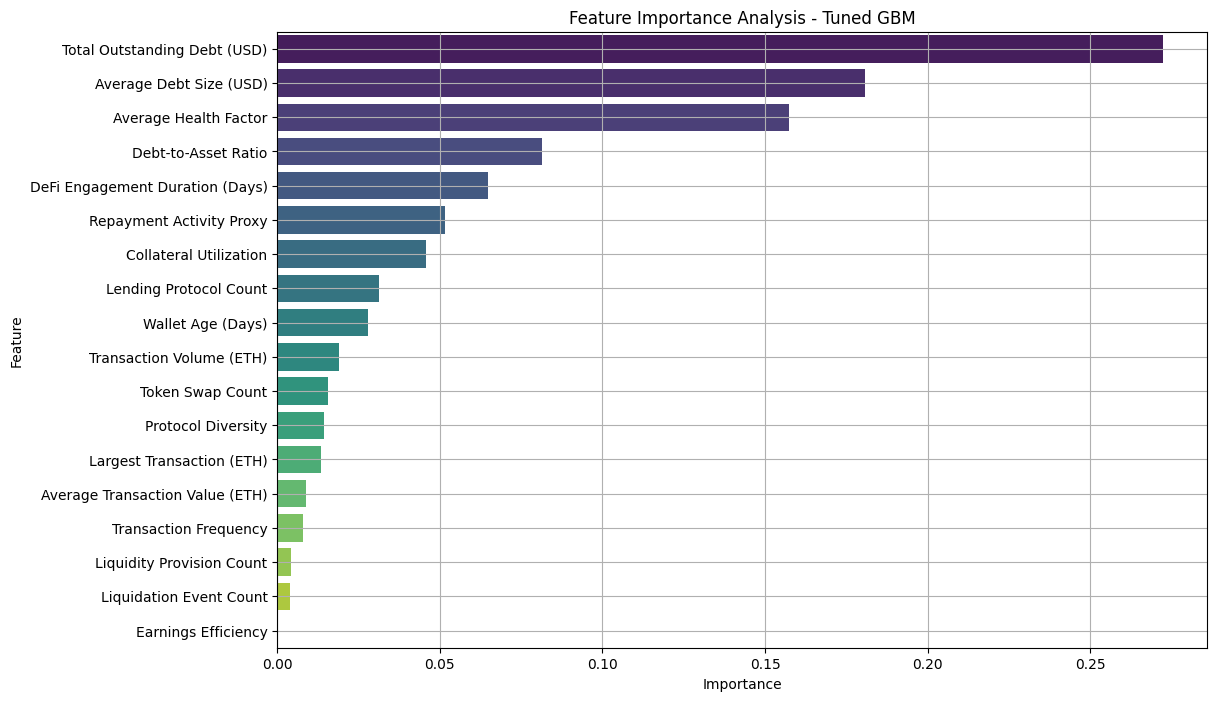

In [8]:
# --- Step 5: Feature Importance Analysis ---
print("\n--- Feature Importance Analysis ---")
feature_importance = best_gbm_model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance Analysis - Tuned GBM')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

## Step 6: Save Best Model

Finally, the best tuned model is saved to disk using `joblib` for future use.

In [9]:
# --- Step 6: Save Best Model ---
# Create the models directory if it doesn't exist
if not os.path.exists("models"):
    os.makedirs("models")

# Save the trained model into the models folder
joblib.dump(best_gbm_model, 'models/gradient_boosting_credit_score_model.pkl')
print("[INFO] GBM Model saved as 'gradient_boosting_credit_score_model.pkl'")

[INFO] GBM Model saved as 'gradient_boosting_credit_score_model.pkl'
